<a href="https://colab.research.google.com/github/MJsanflo/ias_bai_2324/blob/main/subgradient_method_group_merged.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise sheet 7

**Please turn in your exercises by January 9th.**

## Task 1: Covergence

Provide a good intuition why the convergence rate of the subgradient method is $O(1/\varepsilon^2)$.


**4.3 The algorithm**:
An iteration of subgradient descent is defined as:
Let $g_t \in \partial f(x_t)$
**(4.2):**
$$
x_{t+1} := x_t − \gamma_t g_t.
$$

**Theorem 4.7**: Let $f : R^d \rightarrow R $ be convex and B-Lipschitz continuous with a global minimum $x^*$ furthermore, suppose that $∥x_0 − x^*∥ \leq R$.
Choosing the constant stepsize
$$
\gamma_t = \gamma := \frac{R}{B \sqrt T},
$$

subgradient descent (4.2) yields
$$
\frac{1}{T} \sum_{t=0}^{T-1} (f(x_t) - f(x^*)) \leq \frac{R}{B \sqrt T},
$$

**Theorem 2.1 Proof:**

This is a simple calculation on top of (2.6): after plugging in the
bounds $||x - x^*|| \leq R$ and $||g_t|| \leq B$, we get:

$$
\sum_{t=0}^{T-1} (f(x_t) - f(x^*)) \leq \frac{\gamma}{2} B^{2}T + \frac{1}{2_{\gamma}} R^{2},
$$

so want to choose $\gamma$ such that
$$
q(\gamma) = \frac{\gamma}{2} B^{2}T + \frac{R^2}{2_\gamma}
$$
is minimized. Setting the derivative to $0$ yields the above value of $\gamma$, and $q(R/(B \sqrt T)) = RB \sqrt T $. Dividing by $T$, the result follows.

This means that in order to achieve $\min^{T-1}_{t=0} (f(x_t) - f(x^*)) \leq \varepsilon $ we need:
$$
T \geq \frac{R^2 B^2}{\varepsilon^2}
$$
many iterations.


**Definition 2.2**:
$$
f(\mathbf{x}_t) − f(\mathbf{x}^*) \leq \nabla f(\mathbf{x}_t)^⊤(\mathbf{x}_t − \mathbf{x}^*)
$$


**Definition 4.1**: Let $f$ : $dom(f) \rightarrow R$. Then $g \in R^d$ is a subgradient of $f$ at $x \in dom(f)$ if

$$
f(\mathbf{y}) \geq f(\mathbf{x}) + g^⊤(\mathbf{y} − \mathbf{x}) \; ∀\mathbf{y} \in \mathbf{dom}(f)
$$


The proof is identical to the one of Theorem 2.1. The only change is that $g_t$ is a subgradient now and not a gradient, so that the inequality (2.2) now follows from the subgradient property (4.1) instead of the first-order characterization of convexity.

The required bound $∥g_t∥^2 \leq B^2$ follows from Lemma 4.4 (**“convex and Lipschitz = bounded subgradients”**).

Reference : Page 80, Lipschitz convex functions
https://raw.githubusercontent.com/epfml/OptML_course/master/lecture_notes/lecture-notes.pdf


## Task 2: Gradient is sub-gradient

Prove the following lemma.

**Lemma**

If $f: \mathbb{R}^n\rightarrow \mathbb{R}$ is convex and differentiable, then $\forall x, \partial f(x) =\{\nabla f(x)\}$.

Reference: Problem 28 https://github.com/epfml/OptML_course/blob/master/labs/ex04/solution04.pdf

## Task 3: Convexity

Prove the following lemma.

**Lemma**

A function $f: D \rightarrow \mathbb{R}$, $D \subseteq \mathbb{R}^d$ is convex if and only if $D$ is convex and $\forall x \in D$, $\partial f(x) \neq \emptyset$.

_Existance of subgradients everywhere implies convexity._

We assume we have subgradients everywhere. With $ \mathbf{g} \in \partial f(\lambda \mathbf{x} + 1 (1-\lambda)y)$, (4.1) yields:

$$
f(\mathbf{x}) \geq f(\lambda \mathbf{x} + 1 (1-\lambda)y) + g^T ((1-\lambda)(\mathbf{x} - \mathbf{y}))
$$
$$
f(\mathbf{y}) \geq f(\lambda \mathbf{x} + 1 (1-\lambda)y) + g^T (\lambda(\mathbf{y} - \mathbf{x}))
$$

Adding up these two inequalities with multiples $\lambda$ and $1-\lambda$ cancels the subgradient terms and yields
$$
\lambda f(\mathbf{x}) + (1-\lambda) f(\mathbf{y}) \geq f(\lambda \mathbf{x} + (1-\lambda) \mathbf{y})
$$

which is **convexity**.

References
- Page 79, Lemma 4.3 (Exercise 29)
https://raw.githubusercontent.com/epfml/OptML_course/master/lecture_notes/lecture-notes.pdf
- Exercise 29 https://github.com/epfml/OptML_course/blob/master/labs/ex04/solution04.pdf


## Task 4: Smoothing

You can write many convex, not necessarily differentiable function as
$$
f(x) = \max_{i} f_i(x), \quad 1\leq i\leq k
$$
for $k$ convex, differentiable functions $f_i$. One can "smooth" function $f$ by replacing $\max$ with a **LogSumExp** $\mathbf{LSE}$ (also called **RealSoftMax** or multivariable softplus), i.e.,
$$
g(x) = \frac{1}{M}\log\left(\sum_{i=1}^n \exp(M\cdot f_i(x))\right)
$$
for a fixed parameter $M > 0$. The parameter $M$ controls how close $g$ is to $f$, i.e., how "smooth" the approximation $g$ is.

Such a smoothing is a general way of turning any non-differentiable convex function into a differentiable function. If one does this, one can run Nesterov's gradient method on the resulting smooth function and it will take $O(1/\varepsilon)$ many iterations to reach an absolute error of $\varepsilon$ even on functions that are not necessarily strongly convex. Doesn't such an approach violate the lower bound of $O(1/\varepsilon^2)$ for non-differentiable convex functions that are not necessarily strongly convex?

**Answer**:

No, this approach does not violate the lower bound of $O(1/\varepsilon^2)$ for non-differentiable convex functions.

The reason is that the smoothed function $g$ is not actually the original non-differentiable function $f$. Instead, it is an approximation to $f$ that becomes arbitrarily close to $f$ as $M$ becomes large. This means that the convergence rate of $g$ to $f$ is not the same as the convergence rate of Nesterov's gradient method to $g$.

In other words, the smoothing technique allows us to use Nesterov's gradient method to optimize non-differentiable convex functions more efficiently.However, this does not mean that we can overcome the fundamental limitations of non-differentiable optimization.


References:
- LogSumExp https://en.wikipedia.org/wiki/LogSumExp

## Utilities

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [ ]:
def contour_map(f, xb=(-1,1), yb=(-1,1), ax=None):
    if ax is None:
        ax = plt
    (nx, ny) = (100, 100)
    x = np.linspace(*xb, nx)
    y = np.linspace(*yb, ny)
    xv, yv = np.meshgrid(x, y)
    X = np.block([ [xv.reshape(1, -1)], [yv.reshape(1, -1)] ]).T
    zv = np.fromiter((f(x) for x in X), dtype=np.double)
    zv = zv.reshape(nx,ny)
    ax.contour(xv, yv, zv, 15)

def surface_plot(f, xb=(-1,1), yb=(-1,1)):
    (nx, ny) = (45, 45)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = np.linspace(*xb, nx)
    y = np.linspace(*yb, ny)
    xv, yv = np.meshgrid(x, y)
    X = np.block([ [xv.reshape(1, -1)], [yv.reshape(1, -1)] ]).T
    zv = np.fromiter((f(x) for x in X), dtype=np.double)
    zv = zv.reshape(nx,ny)
    ax.plot_surface(xv, yv, zv, cmap=cm.coolwarm)
    return fig, ax

## Task 5: Smoothing plots

Using the idea from **Task 4**, plot the "smooth" approximation of the following functions.


### ReLU

Plot an approximation from Task 4 for the function
$$
\text{ReLU}(x) = \max(x, 0)
$$
for different values of $M$.


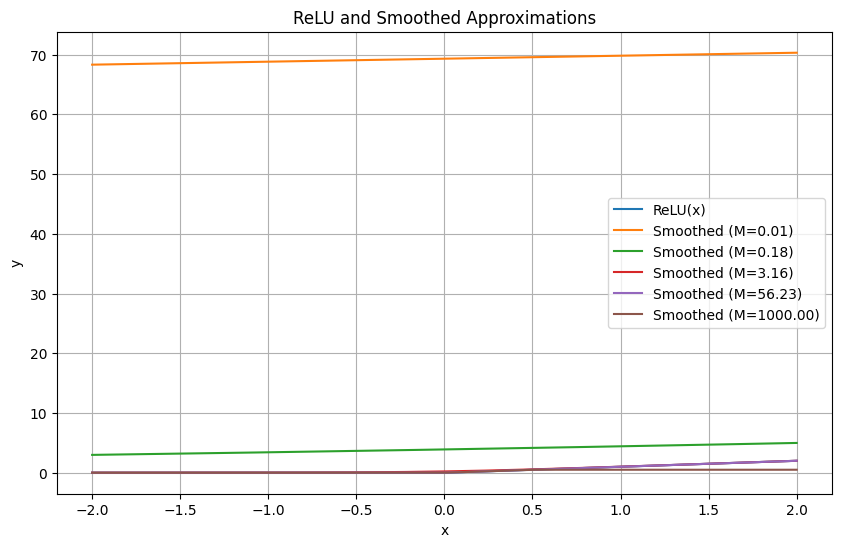

In [ ]:
# Values of M
M_values = np.logspace(-2, 3, 5)

# ReLU function
def relu(x):
    return np.maximum(x, 0)

# Smoothed approximation function
def smoothed_relu(x, M):
    clipped_exp = np.exp(np.clip(M * x, -500, 500))
    return (1/M) * np.log1p(clipped_exp)

# Plotting the functions
x = np.linspace(-2, 2, 400)

plt.figure(figsize=(10, 6))
plt.plot(x, relu(x), label='ReLU(x)')

for M in M_values:
    plt.plot(x, smoothed_relu(x, M), label=f'Smoothed (M={M:.2f})')

plt.title('ReLU and Smoothed Approximations')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

References
- Rectifier NNs https://en.wikipedia.org/wiki/Rectifier_(neural_networks)

### Absolute value

Plot an approximation from Task 4 for the function
$$
\text{abs}(x) = |x|
$$
for different values of $M$.

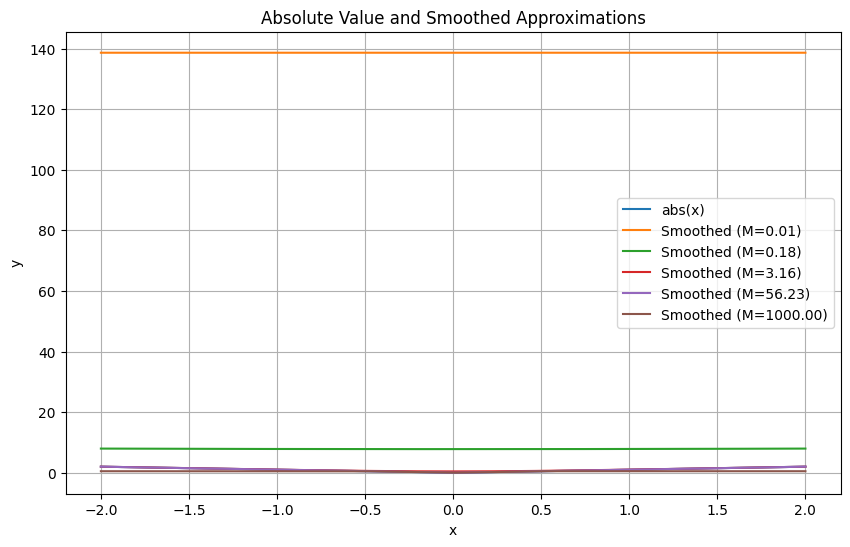

In [ ]:
# Values of M
M_values = np.logspace(-2, 3, 5)

# Absolute value function
def absolute_value(x):
    return np.abs(x)

# Smoothed approximation function
def smoothed_absolute_value(x, M):
    clipped_exp_pos = np.exp(np.clip(M * x, -500, 500))
    clipped_exp_neg = np.exp(np.clip(-M * x, -500, 500))
    return (1/M) * np.log1p(clipped_exp_pos) + (1/M) * np.log1p(clipped_exp_neg)

# Plotting the functions
x = np.linspace(-2, 2, 400)

plt.figure(figsize=(10, 6))
plt.plot(x, absolute_value(x), label='abs(x)')

for M in M_values:
    plt.plot(x, smoothed_absolute_value(x, M), label=f'Smoothed (M={M:.2f})')

plt.title('Absolute Value and Smoothed Approximations')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

References
- https://en.wikipedia.org/wiki/Absolute_value

## Task 6: Sub-gradient method

Implement the sub-gradient method.
* `x0` is the initial point.
* `f` is the function you are trying to minimize.
* `g` is the subgradient of `f`.

Function `subgradient_path` should return a list of vectors on the path to the minimum.

**The Subgradient algorithm**:

Let the subgradient be defined as $g_t \in \partial f(x_t)$ and $\gamma_t$ be our step length, where our **optimal step length** is defined as $\gamma_t = \frac{||x_0 - x^*||}{||g_t|| \sqrt{t+1}} $, an iteration of the method is as follows:
$$
x_{t+1} := x_t − \gamma_t g_t.
$$

In [ ]:
def subgradient_path(x0, f, g, num_iterations=100):
    xs = [x0]

    for t in range(1, num_iterations + 1):
        gt = g(xs[-1])
        norm_gt = np.linalg.norm(gt)

        gamma_t = np.linalg.norm(xs[-1]) / (norm_gt * np.sqrt(t + 1))
        x_tplus1 = xs[-1] - gamma_t * gt
        xs.append(x_tplus1)

    return xs

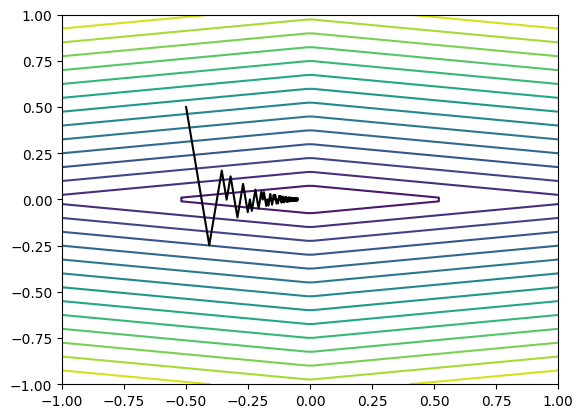

In [ ]:
### example
f = lambda x: abs(x[0]) + abs(8*x[1])
g = lambda x: np.sign(x) * [1, 8]

x0 = np.array([-.5, .5])
x_star = np.array([0, 0])  # Replace this with the optimal point
xs = subgradient_path(x0, f, g)

contour_map(f)
xs = np.array(xs)
plt.plot(xs[:,0], xs[:,1], '-k')
plt.show()

In [ ]:
def errors(x0, f, g, x_star):
    sg = subgradient_path(x0, f, g)

    # Errors over iterations for each function
    plt.semilogy(np.arange(len(sg)), [f(x) for x in sg] - f(x_star), label="Subgradient")
    plt.title('Error Over Time for Different Methods')
    plt.xlabel('Iteration')
    plt.ylabel('Error')
    plt.legend(loc=(1.04, 0))
    plt.show()

### Robust regresssion

Finish the gradient of the function
$$
f(w) = \frac{1}{n}\left\|Xw - y\right\|_1
$$
run the sub-gradient method on it, and plot the function over time.

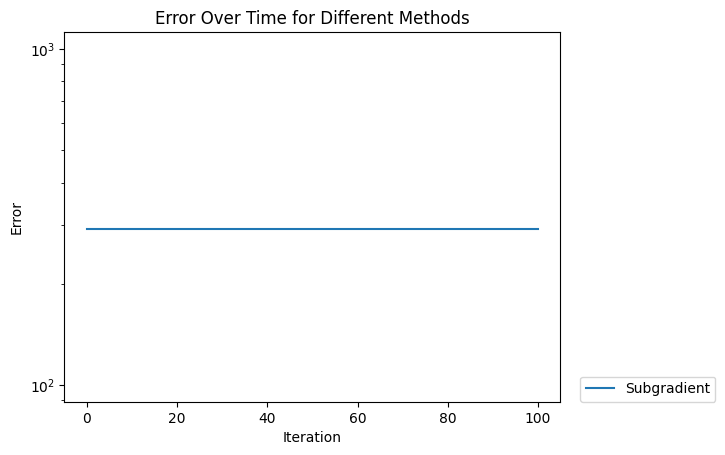

In [ ]:
from sklearn.datasets import make_regression
from scipy.optimize import minimize

def f(w):
    return np.linalg.norm(X @ w - y, 1) / len(X)

def g(w):
    n = len(X)
    gradient = np.zeros_like(w)

    for i in range(n):
        diff = X[i] @ w - y[i]
        sign = np.sign(diff)
        gradient += sign * X[i]

    gradient /= n

    return gradient

X, y = make_regression(n_samples=1000, n_features=100, n_informative=40, random_state=0)
x0 = np.zeros(100)

# Minimize the objective function f(w) using the gradient g(w)
x_star = minimize(f, x0, jac=g).x

errors(x0, f, g, x_star)


### Linear regression with $\mathcal{l}_1$ regularization

Finish the gradient of the function
$$
f(w) = \frac{1}{n}\left\|Xw - y\right\|_2^2 + \|w\|_1,
$$
run the sub-gradient method on it, and plot the function over time.

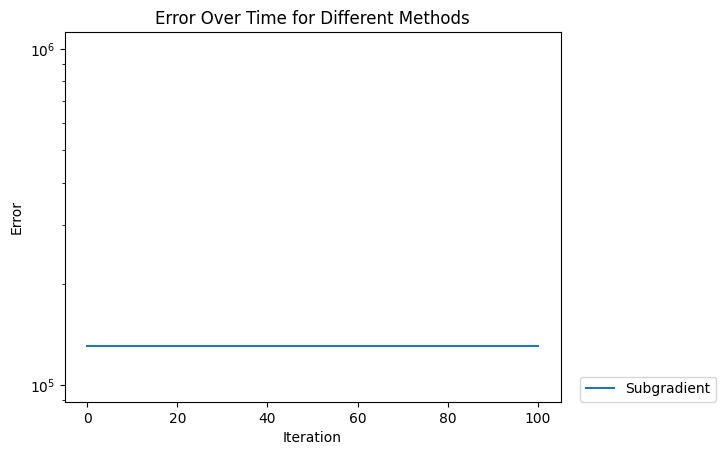

In [ ]:
from sklearn.datasets import make_regression

def f(w):
    return np.linalg.norm(X @ w - y) ** 2 / len(X) + np.linalg.norm(w, 1)

def g(w):
    l2_gradient = 2 * X.T @ (X @ w - y) / len(X)
    l1_gradient = np.sign(w)  # Subdifferential of L1 norm

    gradient = l2_gradient + l1_gradient
    return gradient

X, y = make_regression(n_samples=1000, n_features=100, n_informative=40, random_state=0)
x0 = np.zeros(100)


# Minimize the objective function f(w) using the gradient g(w)
x_star = minimize(f, x0, jac=g).x

errors(x0, f, g, x_star)

### Logistic regression with $\mathcal{l}_1$ regularization

Finish the gradient of the function
$$
f(w) = \frac{1}{n}\sum_{i=1}^n \log(1 + \exp(-y_i \cdot x_i^\top w)) + \|w\|_1
$$
run the sub-gradient method on it, and plot the function over time.

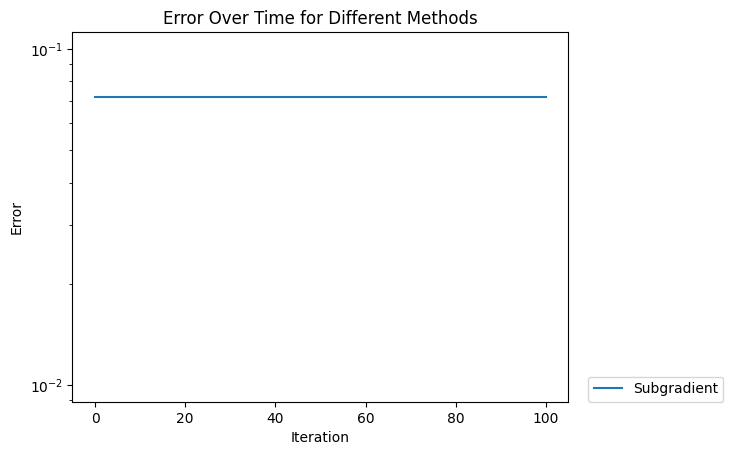

In [ ]:
from sklearn.datasets import make_classification
from scipy.optimize import minimize

def logistic_function(x):
    return 1.0 / (1.0 + np.exp(-x))

def f(w):
    epsilon = 1e-15
    z = y * X.dot(w)
    log_term = np.log(logistic_function(z) + epsilon)
    return -log_term.mean() + 0.1 * np.linalg.norm(w, 1)  # Adjust lambda as needed

def g(w):
    n = len(y)
    z = y * X.dot(w)
    sigmoid = logistic_function(-z)
    grad = (X.T.dot(y * sigmoid)) / n - 0.1 * np.sign(w)  # Adjust lambda as needed
    return -grad  # Note the negative sign for minimization


X, y = make_classification(1000, 80, n_informative=40,
#                               n_redundant=0,
                               n_clusters_per_class=2, flip_y=0.1, random_state=0)

x0 = np.zeros(80)

# Minimize the objective function f(w) using the gradient g(w)
x_star = minimize(f, x0, jac=g).x

errors(x0, f, g, x_star)